In [1]:
import numpy as np

from template_funciones_2 import *#calcula_L, calcula_lambda, calcula_R, calcula_Q, metpot1, metpot2, metpotI,  metpotI2, laplaciano_iterativo, calcula_2E, deflaciona
from template_funciones import *#calcular_inversa, calculaLU
%load_ext autoreload
%autoreload 2

A = np.array([
   [0, 1, 1, 1, 0, 0, 0, 0],
   [1, 0, 1, 1, 0, 0, 0, 0],
   [1, 1, 0, 1, 0, 1, 0, 0],
   [1, 1, 1, 0, 1, 0, 0, 0],
   [0, 0, 0, 1, 0, 1, 1, 1],
   [0, 0, 1, 0, 1, 0, 1, 1],
   [0, 0, 0, 0, 1, 1, 0, 1],
   [0, 0, 0, 0, 1, 1, 1, 0]
])

In [2]:
L = calcula_L(A)

print(f"Matriz L:\n{L}")

mu = 10e-5
v1, l1, _ = metpotI2(L, mu)
print(f"\nAutovector = \n{v1}\n\nAsociado a λ_1 = {l1}")

LAMBDA = calcula_lambda(L, v1)
print(f"\nEl corte minimo para A es {LAMBDA}")

Matriz L:
[[ 3. -1. -1. -1.  0.  0.  0.  0.]
 [-1.  3. -1. -1.  0.  0.  0.  0.]
 [-1. -1.  4. -1.  0. -1.  0.  0.]
 [-1. -1. -1.  4. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  4. -1. -1. -1.]
 [ 0.  0. -1.  0. -1.  4. -1. -1.]
 [ 0.  0.  0.  0. -1. -1.  3. -1.]
 [ 0.  0.  0.  0. -1. -1. -1.  3.]]

Autovector = 
[ 0.4253254   0.4253254   0.26286556  0.26286556 -0.26286556 -0.26286556
 -0.4253254  -0.4253254 ]

Asociado a λ_1 = 1.308745664252509

El corte minimo para A es 2.0


Para encontrar $\Lambda$ tenemos que encontrar el vector $s^{\Lambda}$ optimo que la minimice. Eso equivale a hallar el autovector asociado al segundo autovalor mas pequeño en modulo de $L$ 

In [3]:
mu = 10e-5
v1, l1, _ = metpotI2(L, mu)
print(f"\nAutovector = \n{v1}\n\nAsociado a λ_1 = {l1}")

LAMBDA = calcula_lambda(L, v1)
print(f"\nEl corte minimo para A es {LAMBDA}")


Autovector = 
[ 0.4253254   0.42532541  0.26286556  0.26286556 -0.26286556 -0.26286556
 -0.4253254  -0.4253254 ]

Asociado a λ_1 = 1.3087456642527753

El corte minimo para A es 2.0


In [4]:
s = [1,0,-1]
s_i = np.sign(s)
s_i

array([ 1,  0, -1])

In [5]:
# ver que el auto valor mas chico es 0 y esta asociodo al autvector de 1s
# TODO: no me esta dando 0 je
M = L + mu * np.eye(A.shape[0])
print(np.linalg.eigvals(M))
v1, l1, _ = metpotI(L, mu)
v1, l1-mu

[5.23616798e+00 4.00010000e+00 1.00000000e-04 7.64032023e-01
 6.00010000e+00 4.00010000e+00 4.00010000e+00 4.00010000e+00]


(array([-0.35355339, -0.35355339, -0.35355339, -0.35355339, -0.35355339,
        -0.35355339, -0.35355339, -0.35355339]),
 np.float64(9999.999900002753))

Para hallar el corte minimo podemos hacer recursion sobre la red separandola en $k$ iteraciones. Obteniendo asi $2^{k}$ comunidades.

In [6]:
k = 2
print(laplaciano_iterativo(A, k))

[[1], [0, 2, 3], [4, 6, 7], [5]]


Otra forma de hallar comunidades tiene que ver con la **modularidad**. Donde el objetivo esta en maximizar $Q$. Para eso necesitamos el autovector con autovalor de mayor modulo de la matriz $R = A - P$. $R$ es simetrica. La modularidad puede calcularse entonces como $Q = \frac{1}{4E} s^{t}Rs$ con $2E = \sum_{i}^{n} \sum_{j}^{n} A_{ij}$

In [7]:
#Calculamos R
R = calcula_R(A)

print(f"Vemos que R es simetrica, R = R^t: \n{R == R.T}")
#Calculamos su autovector con autovalor de mayor modulo con el metodo de la potencia
v1, l1, _ = metpot1(R)

print(f"\nAutovector: {v1}\nAsociado a λ_1 = {l1}")

Q = calcula_Q(R, v1)

E2 = calcula_2E(A)

# Hace falta dividir por 1/4E ???
Q = Q * 1/(2*E2)
print(f"\nLa modularidad de la red es {Q}")


Vemos que R es simetrica, R = R^t: 
[[ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]]

Autovector: [-0.3847545  -0.3847545  -0.31933572 -0.31930025  0.31930025  0.31933572
  0.3847545   0.3847545 ]
Asociado a λ_1 = 2.9812811403926602

La modularidad de la red es 0.4209183673469387


Podemos aplicar iterativamente sobre los nuevos grupos obtenidos cuando aplicamos la modularidad. El caso en donde el algoritmo para es cuando dividir un grupo no aumenta la modularidad total


In [8]:
print(modularidad_iterativo(A))

[[4, 5, 6, 7], [0, 1, 2, 3]]


Aqui podemos ver como con el metodo de la potencia los componentes del vector aproximado en $\R^{3}$ converge al autovector asociado al autovalor de mayor modulo. 

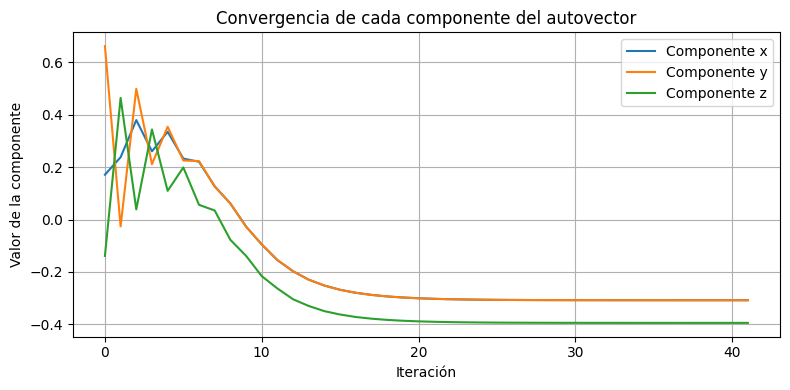

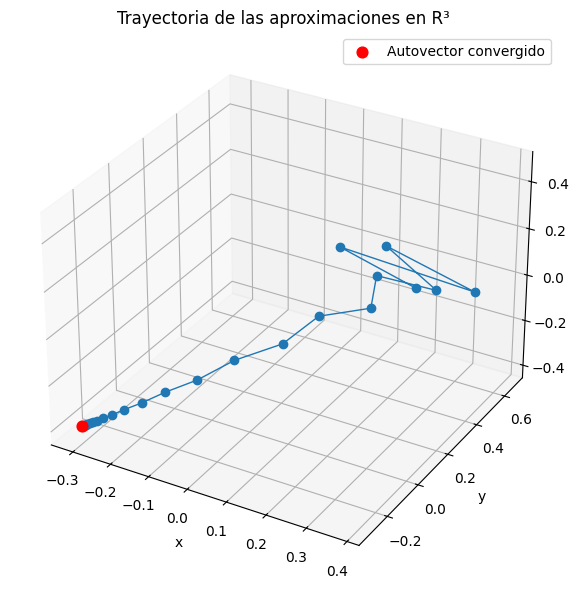

In [9]:
def metpot(A,v,k):
    for i in range(k):
        Av = A @ v
        v = Av / np.linalg.norm(Av, 2)
    return v

# A = np.array([[0.9, 0.075, 0.025], [0.15, 0.8, 0.05], [0.25, 0.25, 0.5]])
# v = np.array([1,0.5,-0.75])


avec, aval, _ = metpot1(A, 1e-10, plot=True)


### 1 - Autovectores y autovalores de $L$ y $R$

a) Muestre que el vector unos es autovector de las matrices $R$ y $L$. ¿Que autovalor tiene? ¿Y que agrupacion de la red representa?

Prueba para $L$

Para que el vector unos sea autovector de L, tiene que cumplir:

$$L \cdot \boldsymbol{1} = \lambda \cdot \boldsymbol{1}$$

Como $L = K - A$,

$$(K-A)\cdot \boldsymbol{1} = \lambda \cdot \boldsymbol{1}$$

$$K\cdot \boldsymbol{1} - A \cdot \boldsymbol{1} = \lambda \cdot \boldsymbol{1}$$


La matriz $K$ es una matriz diagonal donde los elementos de la diagonal son de la forma $\sum_{i=1}^{n} A_{ji}$ con $1 \leq j \leq n$. Como el resto de los elementos $K$ son 0, al multiplicarla con el vector de unos el resultado será un vector donde cada componente $v_j$ es igual a $\sum_{i=1}^{n} A_{ji}$. 

Por otro lado, multiplicar $A$ por el vector unos resultará en un vector donde cada componente $v_j$ es igual a $\sum_{i=1}^{n} A_{ji} . 1 = \sum_{i=1}^{n} A_{ji}$

Entonces,

$$ \begin{pmatrix} \sum_{i=1}^{n} A_{1i} \\\vdots \\\sum_{i=1}^{n} A_{ni} \end{pmatrix} - \begin{pmatrix} \sum_{i=1}^{n} A_{1i} \\\vdots \\\sum_{i=1}^{n} A_{ni} \end{pmatrix} = \lambda \cdot \boldsymbol{1}$$

$$ \boldsymbol{0} = \lambda \cdot \boldsymbol{1}$$

La igualdad sólo es verdadera cuando $\lambda = 0$

Luego, el vector unos es autovector de L asociado al autovalor $\lambda = 0$ 

Prueba para $R$

Para que el vector unos sea autovector de L, tiene que cumplir:

$$R \cdot \boldsymbol{1} = \lambda \cdot \boldsymbol{1}$$

Cómo $R = A - P$

$$(A-P)\cdot \boldsymbol{1} = \lambda \cdot \boldsymbol{1}$$

$$A\cdot \boldsymbol{1} - P \cdot \boldsymbol{1} = \lambda \cdot \boldsymbol{1}$$


Multiplicar $A$ por el vector unos resultará en un vector donde cada componente $v_j$ es igual a $\sum_{i=1}^{n} A_{ji} = K_{ii} = k_i$.

Entonces, sabiendo que los elementos de $P$ tienen la forma $P_{ij}= \frac{k_ik_j}{2E}$:

$$ \begin{pmatrix} k_1 \\\vdots \\ k_n \end{pmatrix} - \begin{pmatrix} \sum_{j=1}^{n} \frac{k_1k_j}{2E} \\\vdots \\ \sum_{j=1}^{n} \frac{k_nk_j}{2E} \end{pmatrix} = \lambda \cdot \boldsymbol{1}$$

$$ \begin{pmatrix} k_1 \\\vdots \\ k_n \end{pmatrix} - \begin{pmatrix} \frac {k_1}{2E}\sum_{j=1}^{n} k_j \\\vdots \\ \frac {k_n}{2E}\sum_{j=1}^{n} k_j \end{pmatrix} = \lambda \cdot \boldsymbol{1}$$

$$ \begin{pmatrix} k_1 \\\vdots \\ k_n \end{pmatrix} - \begin{pmatrix} \frac {k_1}{2E}\sum_{j=1}^{n} \sum_{i=1}^{n} A_{ji} \\\vdots \\ \frac {k_n}{2E}\sum_{j=1}^{n} \sum_{i=1}^{n} A_{ji} \end{pmatrix} = \lambda \cdot \boldsymbol{1}$$

$$ \begin{pmatrix} k_1 \\\vdots \\ k_n \end{pmatrix} - \begin{pmatrix} \frac {k_1}{2E}.2E \\\vdots \\ \frac {k_n}{2E}.2E \end{pmatrix} = \lambda \cdot \boldsymbol{1}$$

$$ \begin{pmatrix} k_1 \\\vdots \\ k_n \end{pmatrix} - \begin{pmatrix}k_1 \\\vdots \\ k_n\end{pmatrix} = \lambda \cdot \boldsymbol{1}$$

$$ \boldsymbol{0} = \lambda \cdot \boldsymbol{1}$$

La igualdad sólo es verdadera cuando $\lambda = 0$

Luego, el vector unos es autovector de R asociado al autovalor $\lambda = 0$

b) Muestren que si $L$ ($R$) tienen dos autovectores $\boldsymbol{v_1}$ y $\boldsymbol{v_2}$ asociados a autovalores $\lambda_1 \neq \lambda_2$, entonces $\boldsymbol{v_1^t}\boldsymbol{v_2} = 0$.

Primero, probaremos que $\boldsymbol{v_1^t} M \boldsymbol{v_2} = \boldsymbol{v_2^t} M \boldsymbol{v_1}$, si $M$ es simétrica ($M \in \mathbb{R}^{n \times n}, \quad v_1, v_2 \in \mathbb{R}^n$).

Como $\boldsymbol{v_1^t} M \boldsymbol{v_2}$ es un número real (producto interno), se cumple que es igual a su traspuesta.

Por lo tanto, 
$$\boldsymbol{v_1^t} M \boldsymbol{v_2}=(\boldsymbol{v_1^t} M \boldsymbol{v_2})^t = (M\boldsymbol{v_2})^t(\boldsymbol{v_1^t})^t = \boldsymbol{v_2}^t M^t \boldsymbol{v_1}$$

Como $M = M^t$ (M es simétrica),

$$=\boldsymbol{v_2}^t M \boldsymbol{v_1}$$

Luego, la propiedad se cumple.

Ahora, para probar la propiedad de la consigna mostraremos que si una matriz M simétrica tiene dos autovectores $\boldsymbol{v_1}$ y $\boldsymbol{v_2}$ asociados a autovalores $\lambda_1 \neq \lambda_2$, entonces $\boldsymbol{v_1^t}\boldsymbol{v_2} = 0$.

Como $\boldsymbol{v_1}$ y $\boldsymbol{v_2}$ son autovectores de M asociados a $\lambda_1$ y $\lambda_2$, respectivamente, se cumple que:

$ M\boldsymbol{v_1} = \lambda_1\boldsymbol{v_1}$ y
$M\boldsymbol{v_2} = \lambda_2\boldsymbol{v_2}$

Por lo que probramos anteriormente,sabemos que:

$$\boldsymbol{v_1^t} M \boldsymbol{v_2} = \boldsymbol{v_2^t} M \boldsymbol{v_1}$$

Reemplazamos según las dos ecuaciones anteriores

$$\boldsymbol{v_1^t} \lambda_2\boldsymbol{v_2} = \boldsymbol{v_2^t} \lambda_1\boldsymbol{v_1}$$
$$\lambda_2\boldsymbol{v_1^t}\boldsymbol{v_2} = \lambda_1 \boldsymbol{v_2^t}\boldsymbol{v_1}$$
$$\lambda_2\boldsymbol{v_1^t}\boldsymbol{v_2} - \lambda_1 \boldsymbol{v_2^t}\boldsymbol{v_1} = 0$$
$$\lambda_2\boldsymbol{v_1^t}\boldsymbol{v_2} - \lambda_1 \boldsymbol{v_1^t}\boldsymbol{v_2} = 0$$
$$(\lambda_2- \lambda_1 )\boldsymbol{v_1^t}\boldsymbol{v_2} = 0$$

Como $\lambda_1 \neq \lambda_2$, $(\lambda_2 - \lambda_1)$ nunca será 0. La igualdad sólo será verdadera cuando $\boldsymbol{v_2^t}\boldsymbol{v_1} = 0$.

Luego la propiedad se cumplir para un M simétrico cualquiera.

Finalmente, como $L$ y $R$ son matrices simétricas, cumplen con la propiedad.

c) Muestren que si $\boldsymbol{v}$ es un autovector de autovalor $\lambda \neq 0$ de $R$ o $L$, entonces $\sum_{i}\boldsymbol{v_i} = 0$.

Por el punto $a)$, sabemos que el vector unos es un autovector tanto de $L$ como de $R$ asociado al autovalor $\lambda_1 = 0$. Además, por la consigna, suponemos que $\boldsymbol{v}$ es un autovector de $R$ o $L$ de autovalor $\lambda_2 \neq 0$ (llamamos $\lambda_2$ a $\lambda$).

Como son dos autovectores asociados a autovalores distintos de $R$ o $L$, por lo mostrado en el punto $b)$ se cumple que $\boldsymbol{v_1^t}\boldsymbol{v_2} = 0$, con $v_1 = \boldsymbol{v}$ y $v_2 = \boldsymbol{1}$.

Entonces,

$$  \boldsymbol{v} \cdot \begin{pmatrix} 1 \\\vdots \\ 1 \end{pmatrix} = 0 $$

$$ \sum_{i} \boldsymbol{v_i . 1} = 0 $$

$$ \sum_{i} \boldsymbol{v_i} = 0 $$

Luego, la propiedad vale tanto para $L$ como para $R$.

### 2 - Extensiones metodo de la potencia
a) $ M \in R^{nxn} $ diagonalizable con autovalores $\lambda{_1}  \ge \lambda{_2} \ge .. \ge \lambda{_n} $  y $\lambda{_i}$ asociado al autovector $v_{i}$

Entonces:

$$(M + \mu I) v{_i} = M v{_i}+ \mu I v{_i} = \lambda{_i} v{_i} + \mu v{_i} = (\lambda{_i} +\mu ) v{_i}$$

Como se puede ver:

$$ \gamma_{i} = (\lambda{_i} +\mu ) \text{ es autovalor de M +} \mu I$$

Ahora veamos que la Matriz $(M + \mu I)$ es no singular:

Como $M$ es diagonalizable entonces necesariamente se escribe 
$$M = CDC^{-1} \text{con } d_{ii} = \lambda_{i}$$

Tambien 

$$\mu I = \mu CC^{-1} =  C\mu C^{-1} $$

Juntando todo: 

$$M + \mu I = CDC^{-1} + C\mu C^{-1} = C(D+ I \mu )C^{-1} $$ 

Entonces para que esto sea inversible cada $\lambda{i} + \mu $ tiene que ser $\neq$ 0 porque sino no seria diagonalizable $M$. 

In [ ]:
## Falta 2.b

c)
$ M $ simetrica , {$ v_1, v_2,.., v_n$} es una base ortonormal de autovectores.

Como es una base ortonormal, sabemos que $<v_i,v_j >$ vale


$$\begin{cases}
0 & \text{si } i = j \\
\| \mathbf{v_i} \|_2^{2} & \text{caso contrario}
\end{cases}
$$

entonces veamos

$$\tilde{M} v_i= ({M} - \lambda_1 \frac{\mathbf{v}_1 \mathbf{v}_1^t}{\mathbf{v}_1^t \mathbf{v}_1})v_i $$




Si $v_i \neq v_1 $ entonces 

  $$v_1^{t} * v_i = 0 \rightarrow \lambda_1 \frac{\mathbf{v}_1 \mathbf{v}_1^t}{\mathbf{v}_1^t \mathbf{v}_1}v_i = 0$$
  
  finalmente $$\tilde{M}v_i ={M} v_i =  \lambda_{i} v_i $$ 

Entonces para i $\neq 1 $ tiene los mismos autovalores.

Si $v_i = v_1 $ entonces

  $$ v_1^{t} * v_1 = \| \mathbf{v_1} \|_2 ^{2}$$ 
  
se puede ver que  

  $$\tilde{M}v_1 = {M}v_1 - \lambda_1 \frac{\mathbf{v}_1 \mathbf{v}_1^t}{\mathbf{v}_1^t \mathbf{v}_1} v_1 = {M}v_1 - \lambda_1 v_1 = \lambda_1 v_1 - \lambda_1 v_1 = 0 v_1$$

Probando que el autovalor asociado a $v_1$ es 0. 



### 2 - Extensiones metodo de la potencia

#### Shifting de autovalores

In [10]:
avec_A, aval_A,_ = metpot1(A)

print(f"Autovector de A:\n{avec_A}\nautovalor asociado: {aval_A}")
mu = 3
M = A + mu*np.eye(A.shape[0])

avec_M, aval_M, _ = metpot1(M) 
print(f"Autovector de A:\n{avec_M}\nautovalor asociado: {aval_M}")

print("aval_A + mu == aval_M: ",np.allclose(aval_A + mu, aval_M))

# Como A tiene 0 en su diagonal diremos que M = A + 0I para confirmar que M no es inversible

calcular_inversa(*calculaLU(A))

Autovector de A:
[0.30776776 0.30776776 0.39415053 0.39415118 0.39405425 0.39405489
 0.30764444 0.30764444]
autovalor asociado: 3.5615527883275235
Autovector de A:
[0.30754855 0.30754855 0.3939797  0.3939797  0.39422568 0.39422568
 0.30786361 0.30786361]
autovalor asociado: 6.561552653043549
aval_A + mu == aval_M:  True
La matriz no es inversible


/home/agus/UBA/TP2-alc-2025-2C/template_funciones.py:44: RuntimeWarning: divide by zero encountered in scalar divide
  factor = U[j, i] / U[i, i]  # Calculo del factor de eliminacion
/home/agus/UBA/TP2-alc-2025-2C/template_funciones.py:45: RuntimeWarning: invalid value encountered in multiply
  U[j, i:] = U[j, i:] - factor * U[i, i:]  # Esacalonamos las filas
/home/agus/UBA/TP2-alc-2025-2C/template_funciones.py:45: RuntimeWarning: invalid value encountered in cast
  U[j, i:] = U[j, i:] - factor * U[i, i:]  # Esacalonamos las filas
/home/agus/UBA/TP2-alc-2025-2C/template_funciones.py:44: RuntimeWarning: invalid value encountered in scalar divide
  factor = U[j, i] / U[i, i]  # Calculo del factor de eliminacion


#### Método de la potencia inverso

Por lo mencionado anteriormente si  $\lambda_{i} \neq 0 \forall i \rightarrow L + \mu I$ es inversible. Nos podemos asegurar de que ningun elemento de la diagonal sea igual a 0.  

In [11]:
L = calcula_L(A)
mu = 1
print(np.diag(L+mu*np.eye(L.shape[0])))

v1, l1, _ = metpotI(L, mu)
print(f"Autovector de autovalor mas chico:\n{v1}\nAutovalor mas chico: {l1}")

#El autovalor es casi 1 ya que le sumamos 1 a los autovalores de L. Si lo restamos obtenemos el autovalor mas chico en modulo de L que es 0.
print(np.allclose(0,l1-mu))

[4. 4. 5. 5. 5. 5. 4. 4.]
Autovector de autovalor mas chico:
[0.35355339 0.35355339 0.35355339 0.35355339 0.35355339 0.35355339
 0.35355339 0.35355339]
Autovalor mas chico: 1.0
True


#### Deflación de Hotelling

Usaremos $A$ que sabemos que es simetrica y por lo tanto tiene una base de autovectores ortogonales para mostrar que una vez deflacionada A, $deflaciona(A) = A'$ su autovector $v_{1}$ asociado al autovalor de mayor modulo $\lambda_{1}$ de A, ahora para $A'$ esta asociado al autovalor 0. Para eso vamos a suponer que si $\lambda = 0$ es el autovalor asociado a $v_{1}$ vale que:

$$ A'v_{1} = \lambda v_{1} = 0v_{1} = 0 $$

In [12]:
#Calculamos el autovector y autovalor de mayor modulo para A
v1,l1,_= metpot1(A,1e-17)

#Aplicamos la deflación a A para obtener A'
deflA = deflaciona(A)

#Calculamos A'v_1
print(deflA@v1)
print(np.allclose(0,deflA@v1))

[-4.11940100e-08 -4.11940101e-08 -3.21633218e-08 -3.21633012e-08
  3.21633002e-08  3.21633205e-08  4.11940091e-08  4.11940091e-08]
False


## Relacion TP1

In [13]:
# Carga de paquetes necesarios para graficar
import matplotlib.pyplot as plt
import geopandas as gpd # Para hacer cosas geográficas
import networkx as nx # Construcción de la red en NetworkX
from template_funciones import *

%load_ext autoreload
%autoreload 2

# Leemos el archivo, retenemos aquellos museos que están en CABA, y descartamos aquellos que no tienen latitud y longitud
museos = gpd.read_file('https://raw.githubusercontent.com/MuseosAbiertos/Leaflet-museums-OpenStreetMap/refs/heads/principal/data/export.geojson')
barrios = gpd.read_file('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


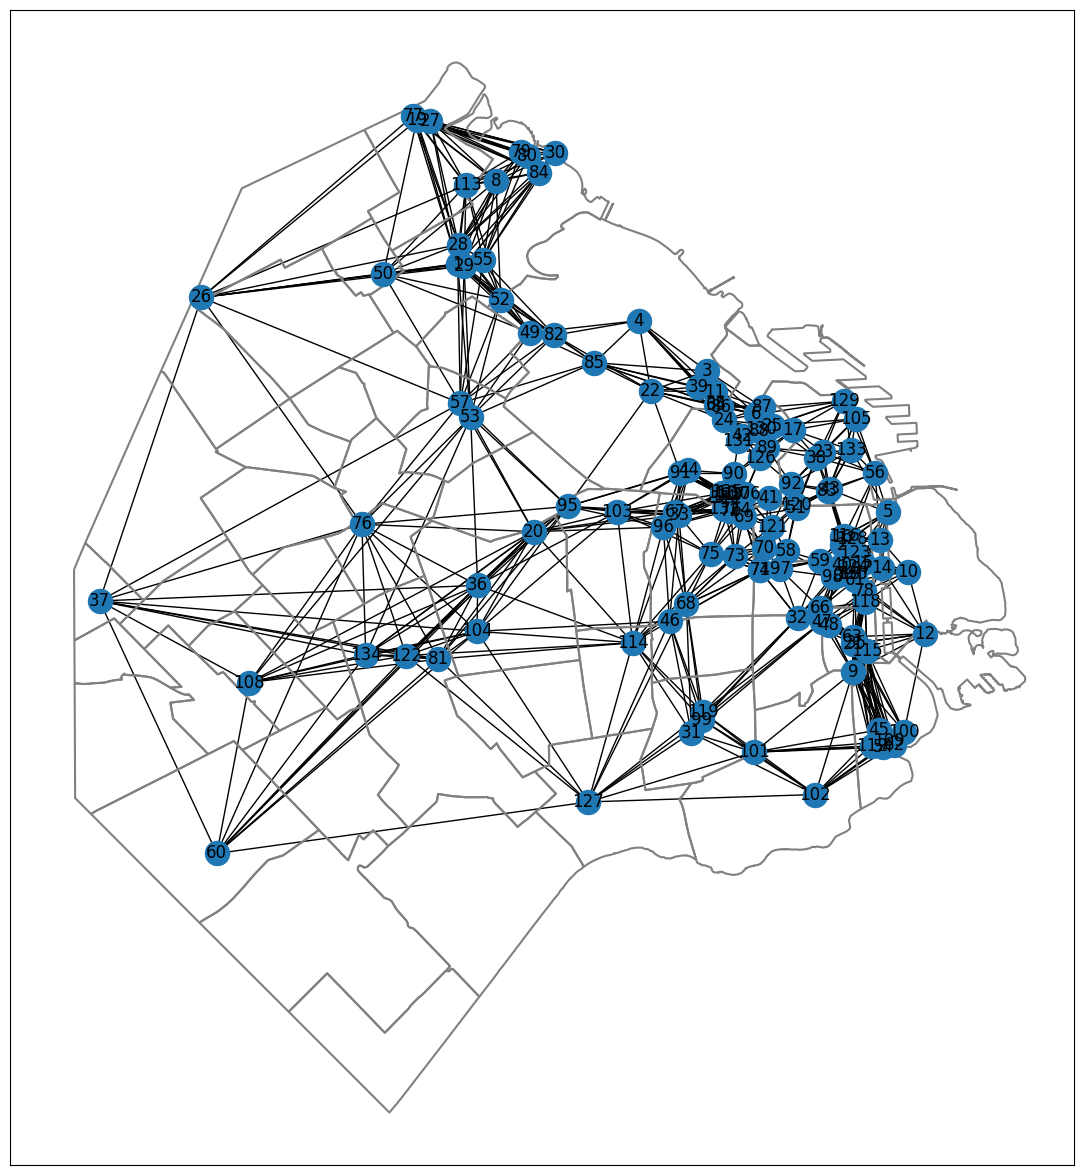

In [14]:
# En esta línea:
# Tomamos museos, lo convertimos al sistema de coordenadas de interés, extraemos su geometría (los puntos del mapa), 
# calculamos sus distancias a los otros puntos de df, redondeamos (obteniendo distancia en metros), y lo convertimos a un array 2D de numpy
D = museos.to_crs("EPSG:22184").geometry.apply(lambda g: museos.to_crs("EPSG:22184").distance(g)).round().to_numpy()
m = 10 # Cantidad de links por nodo
A = construye_adyacencia(D,m)

G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia
# Construimos un layout a partir de las coordenadas geográficas
G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}
fig, ax = plt.subplots(figsize=(15, 15)) # Visualización de la red en el mapa
barrios.to_crs("EPSG:22184").boundary.plot(color='gray',ax=ax) # Graficamos Los barrios
nx.draw_networkx(G,G_layout,ax=ax) # Graficamos los museos

Calculando particiones optimas con el metodo del lapaciano para distintas redes

In [15]:
A = construye_adyacencia(D,10)
A_sim = np.ceil(1/2*(A + A.T))
print(A == A.T)

[[ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]]


4 grupos en red con 3 conexiones
Tiempo laplaciano:  0.10664430001634173
Cantidad de grupos: 4
Grupo 0 | Museos: 19 | Color #1f77b4
Grupo 1 | Museos: 21 | Color #ff7f0e
Grupo 2 | Museos: 57 | Color #2ca02c
Grupo 3 | Museos: 39 | Color #d62728
Nodos con color asignado: 136
4 grupos en red con 5 conexiones
Tiempo laplaciano:  0.09481149999191985
Cantidad de grupos: 4
Grupo 0 | Museos: 22 | Color #1f77b4
Grupo 1 | Museos: 44 | Color #ff7f0e
Grupo 2 | Museos: 46 | Color #2ca02c
Grupo 3 | Museos: 24 | Color #d62728
Nodos con color asignado: 136
4 grupos en red con 10 conexiones
Tiempo laplaciano:  0.09781989999464713
Cantidad de grupos: 4
Grupo 0 | Museos: 43 | Color #1f77b4
Grupo 1 | Museos: 35 | Color #ff7f0e
Grupo 2 | Museos: 37 | Color #2ca02c
Grupo 3 | Museos: 21 | Color #d62728
Nodos con color asignado: 136
4 grupos en red con 50 conexiones
Tiempo laplaciano:  0.09974639999563806
Cantidad de grupos: 4
Grupo 0 | Museos: 38 | Color #1f77b4
Grupo 1 | Museos: 32 | Color #ff7f0e
Grupo 2 | 

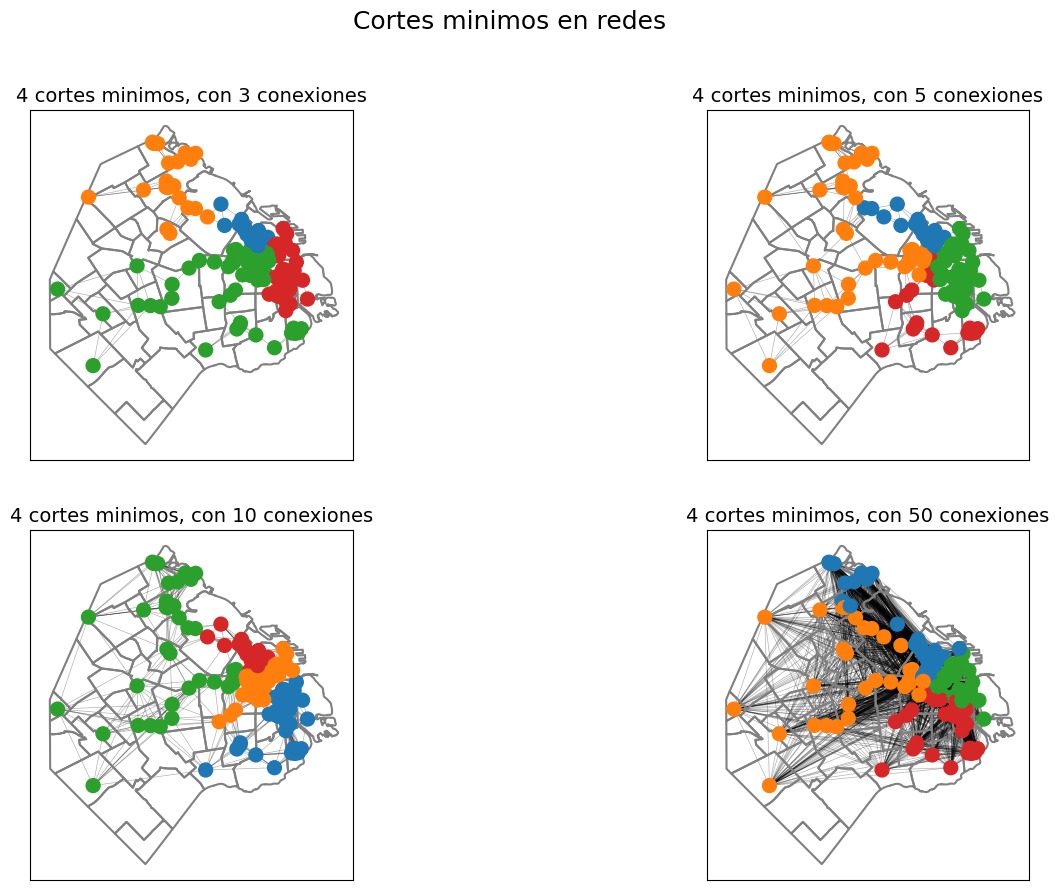

In [29]:
import matplotlib.colors as mcolors
import time


k = 2
ms = [3,5,10,50]
fig, axs = plt.subplots(2, 2, figsize=(16, 10), squeeze=True)
fig.suptitle("Cortes minimos en redes", fontsize=18)
for idx_num, m in enumerate(ms):
    print(f"{2**k} grupos en red con {m} conexiones")
    start = time.perf_counter()
    
    A = construye_adyacencia(D,m)
    A_sim = np.ceil(1/2*(A + A.T))
    nombres = laplaciano_iterativo(A_sim,k)

    print("Tiempo laplaciano: ", time.perf_counter() - start)
    print(f"Cantidad de grupos: {len(nombres)}")
    

    axs = axs.flatten()
    num_grupos = len(nombres)
    colormap = plt.get_cmap('tab10' if num_grupos <= 10 else 'tab20')  # Elegí un mapa de colores. También podés usar 'hsv', 'Set3', etc.

    # Asignar un color a cada grupo
    # Asignar un color a cada grupo
    grupo_color = {}
    for grupo_id, grupo in enumerate(nombres):
        color = mcolors.to_hex(colormap(grupo_id % colormap.N))
        print(f"Grupo {grupo_id} | Museos: {len(grupo)} | Color {color}")
        for nodo in grupo:
            grupo_color[nodo] = color  # Asegura que la clave sea string

    print("Nodos con color asignado:", len(grupo_color))

    # Crear colores de nodos
    colores_nodos = [grupo_color.get(n, "#000000") for n in G.nodes]

    # Dibujar
    barrios.to_crs("EPSG:22184").boundary.plot(color='gray', ax=axs[idx_num])
    axs[idx_num].set_title(f"{num_grupos} cortes minimos, con {m} conexiones", fontsize=14)

    G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia
    # Construimos un layout a partir de las coordenadas geográficas
    G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}
    nx.draw_networkx_nodes(
    G,
    G_layout,
    node_size=100,
    ax=axs[idx_num],
    node_color=colores_nodos
    )
    nx.draw_networkx_edges(
        G,
        G_layout,
        ax=axs[idx_num],
        alpha=0.3,
        width=0.5
    )


Modularidad en red de 3 conexiones.
cantidad de comunidades:  17
Tiempo modularidad:  0.11192480000318028
Cantidad de grupos: 17
Grupo 0 | Museos: 4 | Color #1f77b4
Grupo 1 | Museos: 9 | Color #aec7e8
Grupo 2 | Museos: 16 | Color #ff7f0e
Grupo 3 | Museos: 17 | Color #ffbb78
Grupo 4 | Museos: 5 | Color #2ca02c
Grupo 5 | Museos: 10 | Color #98df8a
Grupo 6 | Museos: 3 | Color #d62728
Grupo 7 | Museos: 3 | Color #ff9896
Grupo 8 | Museos: 1 | Color #9467bd
Grupo 9 | Museos: 5 | Color #c5b0d5
Grupo 10 | Museos: 9 | Color #8c564b
Grupo 11 | Museos: 7 | Color #c49c94
Grupo 12 | Museos: 5 | Color #e377c2
Grupo 13 | Museos: 13 | Color #f7b6d2
Grupo 14 | Museos: 8 | Color #7f7f7f
Grupo 15 | Museos: 11 | Color #c7c7c7
Grupo 16 | Museos: 10 | Color #bcbd22
Nodos con color asignado: 136


c:\Users\yo_ju\Desktop\TP2-alc-2025-2C\template_funciones_2.py:86: RuntimeWarning: invalid value encountered in divide
  avec1 = avec1 / np.linalg.norm(avec1, 2)  # normalizamos


Modularidad en red de 5 conexiones.
cantidad de comunidades:  10
Tiempo modularidad:  0.10278549999929965
Cantidad de grupos: 10
Grupo 0 | Museos: 11 | Color #1f77b4
Grupo 1 | Museos: 20 | Color #ff7f0e
Grupo 2 | Museos: 4 | Color #2ca02c
Grupo 3 | Museos: 12 | Color #d62728
Grupo 4 | Museos: 15 | Color #9467bd
Grupo 5 | Museos: 13 | Color #8c564b
Grupo 6 | Museos: 9 | Color #e377c2
Grupo 7 | Museos: 19 | Color #7f7f7f
Grupo 8 | Museos: 12 | Color #bcbd22
Grupo 9 | Museos: 21 | Color #17becf
Nodos con color asignado: 136
Modularidad en red de 10 conexiones.
cantidad de comunidades:  7
Tiempo modularidad:  0.03780610000831075
Cantidad de grupos: 7
Grupo 0 | Museos: 18 | Color #1f77b4
Grupo 1 | Museos: 26 | Color #ff7f0e
Grupo 2 | Museos: 27 | Color #2ca02c
Grupo 3 | Museos: 13 | Color #d62728
Grupo 4 | Museos: 24 | Color #9467bd
Grupo 5 | Museos: 8 | Color #8c564b
Grupo 6 | Museos: 20 | Color #e377c2
Nodos con color asignado: 136
Modularidad en red de 50 conexiones.
cantidad de comunida

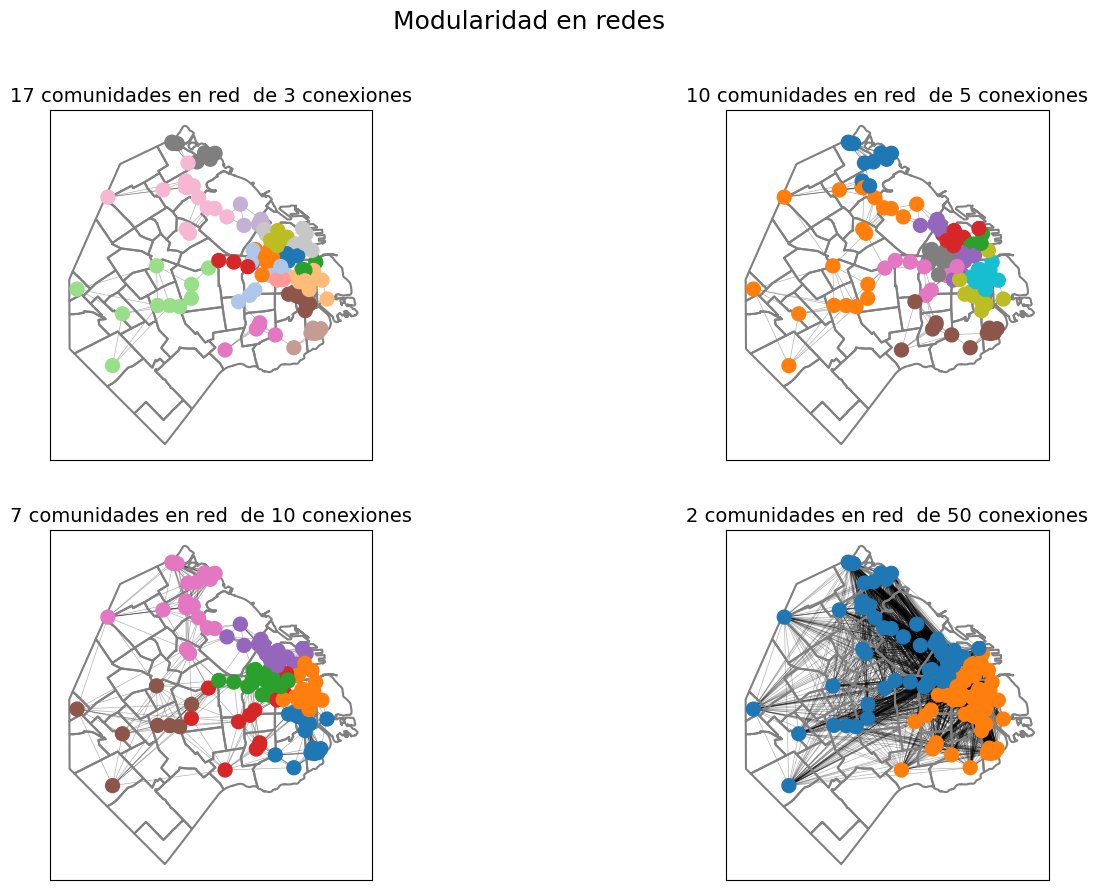

In [37]:
ms = [3,5,10,50]

fig, axs = plt.subplots(2, 2, figsize=(16, 10), squeeze=True)
fig.suptitle("Modularidad en redes", fontsize=18)
for idx_num, m in enumerate(ms):
    print(f"Modularidad en red de {m} conexiones.")
    start = time.perf_counter()
    
    A = construye_adyacencia(D,m)
    A_sim = np.ceil(1/2*(A + A.T))
    nombres = modularidad_iterativo(A_sim)
    print("cantidad de comunidades: ", len(nombres))
    print("Tiempo modularidad: ", time.perf_counter() - start)
    print(f"Cantidad de grupos: {len(nombres)}")
    

    axs = axs.flatten()
    num_grupos = len(nombres)
    colormap = plt.get_cmap('tab10' if num_grupos <= 10 else 'tab20')  # Elegí un mapa de colores. También podés usar 'hsv', 'Set3', etc.

    # Asignar un color a cada grupo
    # Asignar un color a cada grupo
    grupo_color = {}
    for grupo_id, grupo in enumerate(nombres):
        color = mcolors.to_hex(colormap(grupo_id % colormap.N))
        print(f"Grupo {grupo_id} | Museos: {len(grupo)} | Color {color}")
        for nodo in grupo:
            grupo_color[nodo] = color  # Asegura que la clave sea string

    print("Nodos con color asignado:", len(grupo_color))

    # Crear colores de nodos
    colores_nodos = [grupo_color.get(n, "#000000") for n in G.nodes]

    # Dibujar
    barrios.to_crs("EPSG:22184").boundary.plot(color='gray', ax=axs[idx_num])
    axs[idx_num].set_title(f"{num_grupos} comunidades en red  de {m} conexiones", fontsize=14)

    G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia
    # Construimos un layout a partir de las coordenadas geográficas
    G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}
    nx.draw_networkx_nodes(
    G,
    G_layout,
    node_size=100,
    ax=axs[idx_num],
    node_color=colores_nodos,
    )
    nx.draw_networkx_edges(
        G,
        G_layout,
        ax=axs[idx_num],
        alpha=0.3,
        width=0.5
    )